In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as pp
from msmbuilder.example_datasets import fetch_alanine_dipeptide
from msmbuilder.cluster import KCenters
from msmbuilder.msm import ContinuousTimeMSM, MarkovStateModel
from msmbuilder.msm import implied_timescales

In [2]:
trajectories = fetch_alanine_dipeptide()['trajectories']
heavy_inds = trajectories[0].topology.select_atom_indices('heavy')
trajectories = [t.atom_slice(heavy_inds) for t in trajectories]

In [3]:
cluster = KCenters(metric='rmsd', n_clusters=25)
sequences = cluster.fit_transform(trajectories)
print(cluster.summarize())

KCenters clustering
--------------------
n_clusters : 25
metric     : rmsd

Inertia       : 2761.48470724
Mean distance : 0.0276151232237
Max  distance : 0.0457203102202



In [4]:
lag_times = [1, 4, 8, 12]
n_timescales = 10

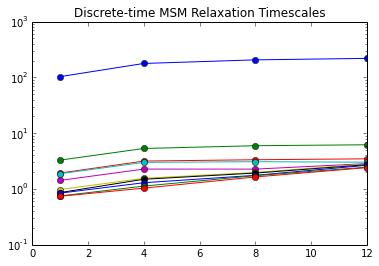

In [5]:
msm_timescales = implied_timescales(sequences, lag_times, n_timescales=n_timescales, msm=MarkovStateModel(verbose=False))
for i in range(n_timescales):
   pp.plot(lag_times, msm_timescales[:, i], 'o-')

pp.title('Discrete-time MSM Relaxation Timescales')
pp.semilogy()
pp.show()

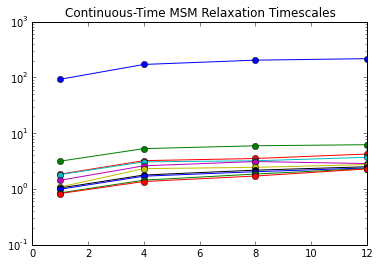

In [6]:
ctmsm_timescales = implied_timescales(sequences, lag_times, n_timescales=n_timescales, msm=ContinuousTimeMSM(verbose=False))
for i in range(n_timescales):
   pp.plot(lag_times, ctmsm_timescales[:, i], 'o-')

pp.title('Continuous-Time MSM Relaxation Timescales')
pp.semilogy()
pp.show()